In [2]:
!pip install catboost

     |████████████████████████████████| 69.2 MB 4.8 kB/s 


In [3]:
!pip install shap

     |████████████████████████████████| 356 kB 5.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491635 sha256=748cd721a5b72f43af9d3086c04124852df2bf59e21c739ecefcb5d18ba30297
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [4]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from numpy import mean
from numpy import std
import numpy as np
import pandas as pd
import sklearn
import math
from sklearn.metrics import log_loss, accuracy_score, classification_report
from sklearn.metrics import matthews_corrcoef, make_scorer, roc_auc_score, roc_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets,linear_model,preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge

In [6]:
Train = pd.read_csv('/content/drive/MyDrive/9417 Proj/train.csv')
Test = pd.read_csv('/content/drive/MyDrive/9417 Proj/test.csv')

In [9]:
print(Train.head())
print("Train Set Shape:",end="")
print(Train.shape)

   ACTION  RESOURCE  MGR_ID  ...  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE
0       1     39353   85475  ...            117906       290919     117908
1       1     17183    1540  ...            118536       308574     118539
2       1     36724   14457  ...            267952        19721     117880
3       1     36135    5396  ...            240983       290919     118322
4       1     42680    5905  ...            123932        19793     119325

[5 rows x 10 columns]
Train Set Shape:(32769, 10)


In [10]:
print(Train.shape)

(32769, 10)


In [11]:
Test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [12]:
print(Test.shape)

(58921, 10)


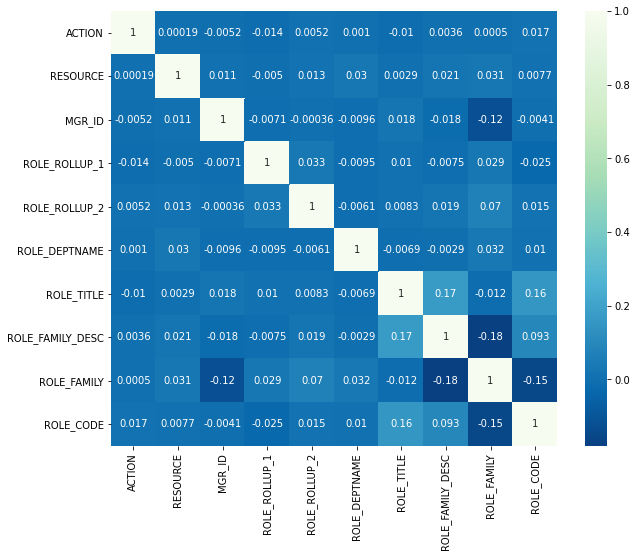

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(Train.corr(), annot=True,cmap="GnBu_r")

In [14]:
'''Split Train into Train_Y and Train_X
  Train_Y is the first column 'ACTION'
  Train_X is the combination of other columns
  Test_X is the combination after Test drops column 'id' 
'''
Train_Y = Train["ACTION"]
Train_X = Train.drop("ACTION",axis=1)
Column_ID = Test["id"]
Test_X = Test.drop("id",axis=1)


In [16]:
Train_X, Valid_X, Train_Y, Valid_Y = split(Train_X, Train_Y, test_size=0.2, random_state=0, stratify=Train_Y)

In [17]:
print("Train set after pre-processing:",end="")
Train_X.head()

Train set after pre-processing:

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
17034,79032,5405,117961,118343,119598,117905,117906,290919,117908
1113,79092,5339,117961,118300,19772,123045,248000,120518,123047
25184,75078,28253,118315,118463,123089,118259,148669,290919,118261
20193,80754,13419,117961,118300,120059,120313,127733,118424,120315
31747,15716,55642,118256,118257,117945,118995,118806,292795,118997


In [18]:
print("Test set after pre-processing:",end="")
Test_X.head()

Test set after pre-processing:

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [20]:
Train_X1, Train_Y1 = np.array(Train_X), np.array(Train_Y)
Valid_X1, Valid_Y1 = np.array(Valid_X), np.array(Valid_Y)

# **Logistic**

In [21]:
Clf = LogisticRegression(C=1,solver="lbfgs",penalty='l2', class_weight="balanced")
Clf.fit(Train_X1, Train_Y1)
Pred_Y = Clf.predict(Valid_X1)
Pred = []
'''
The prediction labels are probabilties
I need to change it into label 0 or 1 '''
for i in Pred_Y:
  if i>= 0.5:
    Pred.append(1)
  else :
    Pred.append(0)
Pred = np.array(Pred)

#Accuracy1 = Clf.score(Valid_X, Valid_Y)
print("Logistic Regression")
print(classification_report(Valid_Y1, Pred))
Accuracy_Train = Clf.score(Train_X1, Train_Y1)
Accuracy_Test = Clf.score(Valid_X1, Valid_Y1)
Accuracy1 = accuracy_score(Pred, Valid_Y1)
print("Accuracy_Score:",end="")
print(Accuracy1)
print()

Logistic Regression
              precision    recall  f1-score   support

           0       0.07      0.70      0.12       379
           1       0.96      0.40      0.56      6175

    accuracy                           0.41      6554
   macro avg       0.51      0.55      0.34      6554
weighted avg       0.90      0.41      0.53      6554

Accuracy_Score:0.41272505340250226



# **Linear Regression**

In [22]:
Clf = LinearRegression()
Clf.fit(Train_X1, Train_Y1)
Pred_Y = Clf.predict(Valid_X1)
Pred = []
#Accuracy1 = accuracy_score(Pred_Y, Valid_Y1)
#print(Accuracy1)
for i in Pred_Y:
  if i>= 0.5:
    Pred.append(1)
  else :
    Pred.append(0)
Pred = np.array(Pred)

print("Linear Regression")
print(classification_report(Valid_Y1, Pred))
Accuracy1 = accuracy_score(Pred, Valid_Y1)
print("Accuracy_Score:",end="")
print(Accuracy1)
print()
Pred2= Clf.predict(Train_X1)
Pred22 = []
for i in Pred2:
  if i>= 0.5:
    Pred22.append(1)
  else :
    Pred22.append(0)
Pred22 = np.array(Pred22)
Accuracy2 = accuracy_score(Pred22, Train_Y1)



Linear Regression
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       379
           1       0.94      1.00      0.97      6175

    accuracy                           0.94      6554
   macro avg       0.47      0.50      0.49      6554
weighted avg       0.89      0.94      0.91      6554

Accuracy_Score:0.9421727189502593



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'print(np.sum(Clf.coef_ != 0))'


# **Decision Trees**

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(Train_X1, Train_Y1)
Pred_Y = DT.predict(Valid_X1)
print("Decision Trees")
print(classification_report(Valid_Y1, Pred_Y))
Pred = []
#Accuracy1 = accuracy_score(Pred_Y, Valid_Y1)
#print(Accuracy1)
for i in Pred_Y:
  if i>= 0.5:
    Pred.append(1)
  else :
    Pred.append(0)
Pred = np.array(Pred)

Accuracy1 = accuracy_score(Pred, Valid_Y1)
print("Accuracy_Score:",end="")
print(Accuracy1)
print()

Decision Trees
              precision    recall  f1-score   support

           0       0.38      0.44      0.41       379
           1       0.97      0.96      0.96      6175

    accuracy                           0.93      6554
   macro avg       0.67      0.70      0.68      6554
weighted avg       0.93      0.93      0.93      6554

Accuracy_Score:0.9267622825755264



In [ ]:
n=DT.feature_importances_
Fea_list = Train_X.columns
f_importance = pd.DataFrame({
        "Features": Fea_list,
        "Importance": n 
})
f_importance= f_importance.sort_values(by=["Importance"],ascending=False)
f_importance

,Features,Importance
0,RESOURCE,0.399425
1,MGR_ID,0.212691
4,ROLE_DEPTNAME,0.106193
6,ROLE_FAMILY_DESC,0.092330
3,ROLE_ROLLUP_2,0.054006
2,ROLE_ROLLUP_1,0.039997
8,ROLE_CODE,0.033823
5,ROLE_TITLE,0.032598
7,ROLE_FAMILY,0.028938


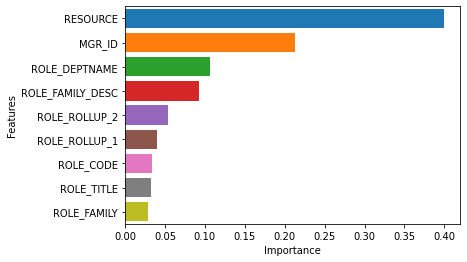

In [ ]:
sns.barplot(x='Importance', y="Features", data=f_importance, saturation=2.0, )

# **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(Train_X1, Train_Y1)
Pred_Y = RF.predict(Valid_X1)
print("Random Forest")
print(classification_report(Valid_Y1, Pred_Y))
Pred = []
for i in Pred_Y:
  if i>= 0.5:
    Pred.append(1)
  else :
    Pred.append(0)
Pred = np.array(Pred)

print("Accuracy_Score:",end="")
Accuracy1 = accuracy_score(Pred, Valid_Y1)
print(Accuracy1)

Random Forest
              precision    recall  f1-score   support

           0       0.58      0.39      0.46       379
           1       0.96      0.98      0.97      6175

    accuracy                           0.95      6554
   macro avg       0.77      0.69      0.72      6554
weighted avg       0.94      0.95      0.94      6554

Accuracy_Score:0.9481232834909978


In [27]:
impt = RF.feature_importances_
Fea_list = Train_X.columns
f_importance = pd.DataFrame({
        "Features": Fea_list,
        "Importance": impt 
})
f_importance= f_importance.sort_values(by=["Importance"],ascending=False)
print(f_importance)

           Features  Importance
0          RESOURCE    0.365228
1            MGR_ID    0.185584
4     ROLE_DEPTNAME    0.118636
6  ROLE_FAMILY_DESC    0.103345
3     ROLE_ROLLUP_2    0.072333
8         ROLE_CODE    0.044915
5        ROLE_TITLE    0.043790
2     ROLE_ROLLUP_1    0.035279
7       ROLE_FAMILY    0.030891


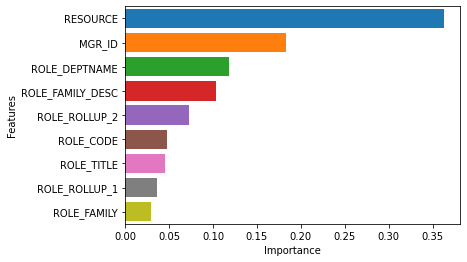

In [ ]:
sns.barplot(x='Importance', y="Features", data=f_importance, saturation=2.0 )

# **Catboost**

In [28]:
import catboost
from catboost.eval.evaluation_result import *
from catboost import CatBoostClassifier,CatBoostRegressor, Pool, MetricVisualizer

In [37]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [29]:
Model = CatBoostClassifier(loss_function="Logloss", eval_metric="AUC", verbose=200, random_seed=1)
Model.fit(Train_X, Train_Y, eval_set=(Valid_X, Valid_Y),plot=True,use_best_model=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.071005
0:	test: 0.6030562	best: 0.6030562 (0)	total: 65.7ms	remaining: 1m 5s
200:	test: 0.8188275	best: 0.8188275 (200)	total: 3.23s	remaining: 12.8s
400:	test: 0.8427473	best: 0.8430105 (398)	total: 6.38s	remaining: 9.53s
600:	test: 0.8476325	best: 0.8477017 (599)	total: 9.62s	remaining: 6.39s
800:	test: 0.8502261	best: 0.8512226 (770)	total: 12.9s	remaining: 3.21s
999:	test: 0.8518674	best: 0.8519037 (998)	total: 16.2s	remaining: 0us

bestTest = 0.8519036886
bestIteration = 998

Shrink model to first 999 iterations.


In [33]:
Pred_Y = Model.predict(Valid_X1)
print(classification_report(Valid_Y1, Pred_Y))
print("Train Set Accuracy_Score:",end="")
print(Model.score(Train_X, Train_Y))
print("Validation Accuracy_Score:",end="")
print(Model.score(Valid_X, Valid_Y))

              precision    recall  f1-score   support

           0       0.75      0.21      0.33       379
           1       0.95      1.00      0.97      6175

    accuracy                           0.95      6554
   macro avg       0.85      0.60      0.65      6554
weighted avg       0.94      0.95      0.94      6554

Train Set Accuracy_Score:0.9637230593171848
Validation Accuracy_Score:0.950259383582545


In [35]:
Model = CatBoostClassifier(loss_function="Logloss", eval_metric="AUC", verbose=200, cat_features=[0, 1, 2, 3, 4, 5, 6, 7, 8], random_seed=1)
Model.fit(Train_X, Train_Y, eval_set=(Valid_X, Valid_Y), use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.071005
0:	test: 0.5113215	best: 0.5113215 (0)	total: 45.5ms	remaining: 45.4s
200:	test: 0.9177104	best: 0.9177104 (200)	total: 12.5s	remaining: 49.8s
400:	test: 0.9198090	best: 0.9198534 (398)	total: 26.3s	remaining: 39.2s
600:	test: 0.9180994	best: 0.9202824 (472)	total: 40.8s	remaining: 27.1s
800:	test: 0.9169489	best: 0.9202824 (472)	total: 55.3s	remaining: 13.7s
999:	test: 0.9153466	best: 0.9202824 (472)	total: 1m 9s	remaining: 0us

bestTest = 0.9202824394
bestIteration = 472

Shrink model to first 473 iterations.


In [36]:
Pred_Y = Model.predict(Valid_X1)
print(classification_report(Valid_Y1, Pred_Y))
print("Train Set Accuracy_Score:",end="")
print(Model.score(Train_X, Train_Y))
print("Validation Accuracy_Score:",end="")
print(Model.score(Valid_X, Valid_Y))

              precision    recall  f1-score   support

           0       0.71      0.45      0.55       379
           1       0.97      0.99      0.98      6175

    accuracy                           0.96      6554
   macro avg       0.84      0.72      0.76      6554
weighted avg       0.95      0.96      0.95      6554

Train Set Accuracy_Score:0.981270265115392
Validation Accuracy_Score:0.9575831553249924


In [42]:
f_importance = Model.get_feature_importance(prettified=True)
f_importance

,Feature Id,Importances
0,RESOURCE,20.559798
1,ROLE_DEPTNAME,18.696121
2,MGR_ID,14.486794
3,ROLE_ROLLUP_2,10.320940
4,ROLE_TITLE,9.647583
5,ROLE_FAMILY_DESC,9.415698
6,ROLE_ROLLUP_1,6.185673
7,ROLE_FAMILY,5.938150
8,ROLE_CODE,4.749242


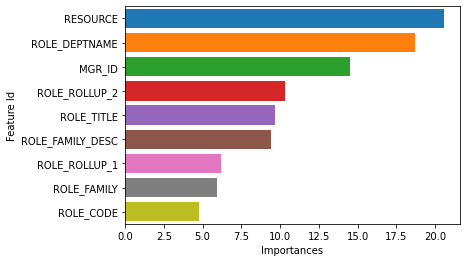

In [39]:
sns.barplot(x='Importances', y='Feature Id', data=f_importance, saturation=4.0)

In [40]:
Sample = pd.read_csv('/content/drive/MyDrive/9417 Proj/sampleSubmission.csv')

In [41]:
Sample1= Sample.iloc[100:105,:]
Sample1

,Id,Action
100,101,0
101,102,0
102,103,0
103,104,0
104,105,0


In [43]:
Pred_Test_Y = Model.predict(Test_X)
type(Pred_Test_Y)

'''Save the prediction result of Test_X set as 'Employee_Access_Predict.csv' '''
Predictive_Model = pd.DataFrame({
        "Id": Column_ID,
        "Action": Pred_Test_Y
})
Predictive_Model.to_csv('Employee_Access_Predict.csv', index=False)

In [44]:
Output = pd.read_csv('/content/Employee_Access_Predict.csv')

In [45]:
Output1= Output.iloc[100:105,:]
Output1

,Id,Action
100,101,1
101,102,0
102,103,1
103,104,1
104,105,0


# **Shap-Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


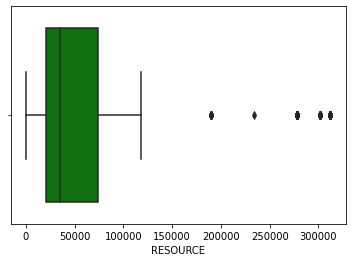

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


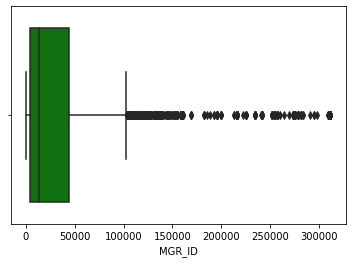

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


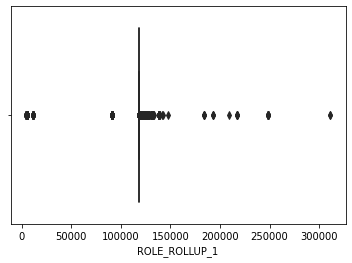

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


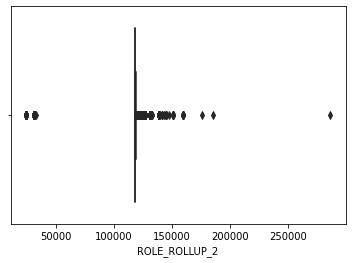

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


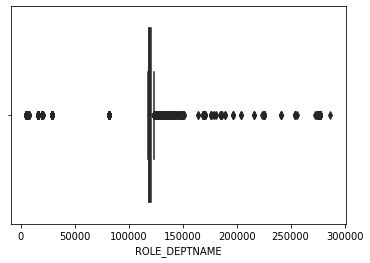

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


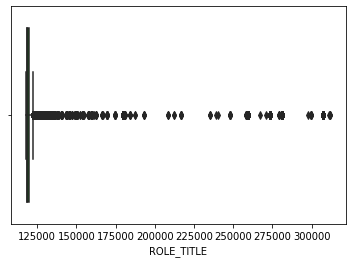

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


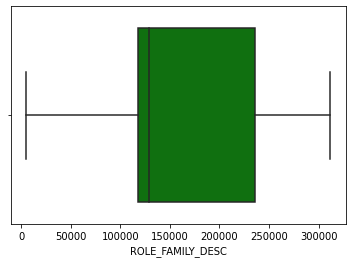

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


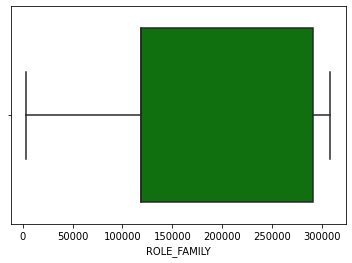

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


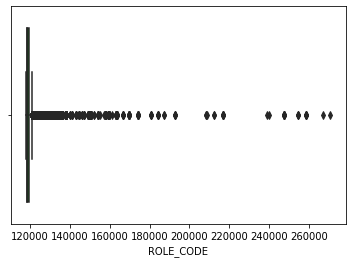

In [ ]:
for i in Train_X.describe().columns:
    sns.boxplot(Train_X[i].dropna(), color='g')
    plt.show()

In [61]:
P1 = Pool(data=Train_X, label=Train_Y, cat_features=[0,1,2,3,4,5,6,7,8])
values = Model.get_feature_importance(data=P1, type='ShapValues')
expected_val = values[1,-1]
shap_val = values[:,:-1]

In [48]:
import shap
shap.initjs()
shap.force_plot(expected_val, shap_val[1,:], Train_X.iloc[1,:])

In [53]:
import shap
shap.initjs()
values = Model.get_feature_importance(data=P1, type='ShapValues')
expected_val = values[50,-1]
shap_val = values[:,:-1]
shap.force_plot(expected_val, shap_val[50,:], Train_X.iloc[50,:])

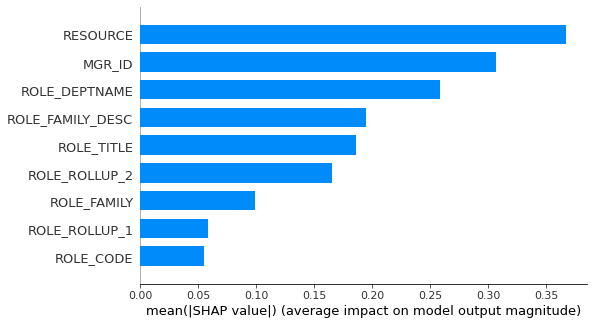

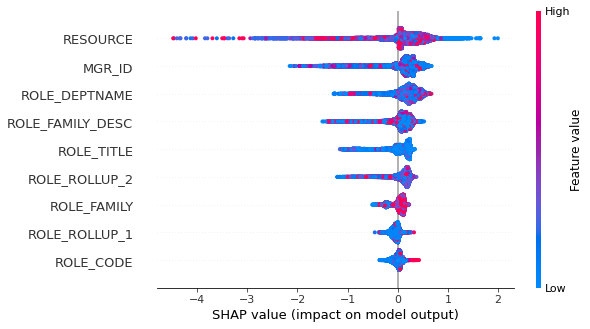

In [64]:
import shap
shap.initjs()
values = Model.get_feature_importance(data=P1, type='ShapValues')
shap_val = values[:,:-1]
shap.summary_plot(shap_val, Train_X, plot_type="bar")
shap.summary_plot(shap_val, Train_X)

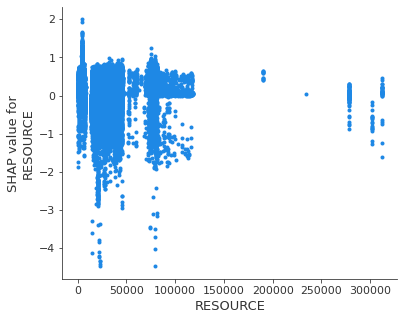

In [65]:
shap.dependence_plot("RESOURCE", shap_values, Train_X, interaction_index=None)

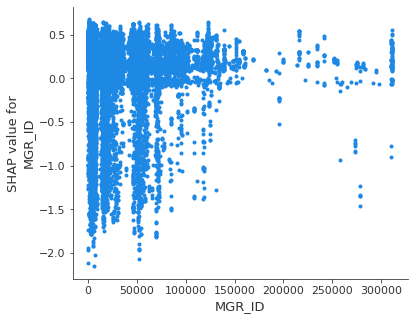

In [66]:
shap.dependence_plot("MGR_ID", shap_values, Train_X, interaction_index=None)

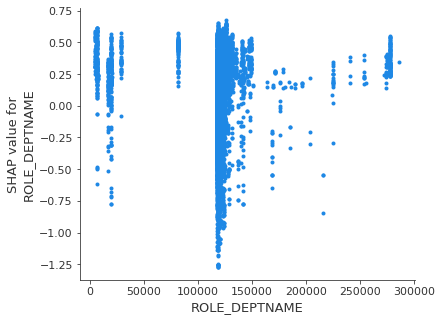

In [67]:
shap.dependence_plot("ROLE_DEPTNAME", shap_values, Train_X, interaction_index=None)

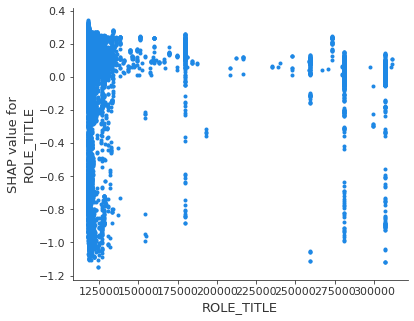

In [68]:
shap.dependence_plot("ROLE_TITLE", shap_values, Train_X,interaction_index=None)

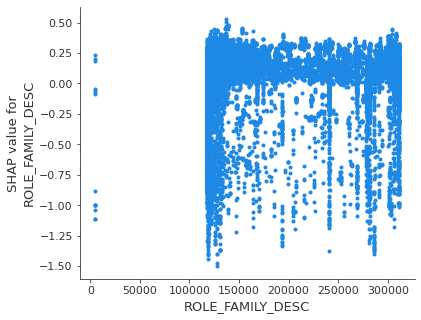

In [69]:
shap.dependence_plot("ROLE_FAMILY_DESC", shap_values, Train_X, interaction_index=None)

In [70]:
import shap
shap.initjs()
x_small = Train_X.iloc[0:200]
shap_small = shap_values[:200]
shap.force_plot(expected_value, shap_small, x_small)